<a href="https://colab.research.google.com/github/Bhuvannnn/Crop-Prediction/blob/main/RGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/RGS/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Data PreProcessing


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
print(len(df.columns))

8


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Exploratory Data Analysis


Checking Null Values

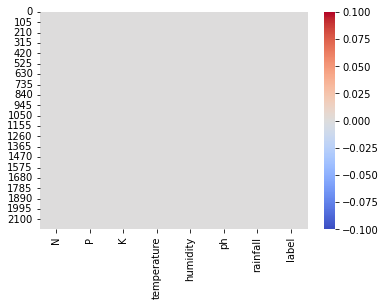

In [ ]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

Checking If dataset is balanced or not


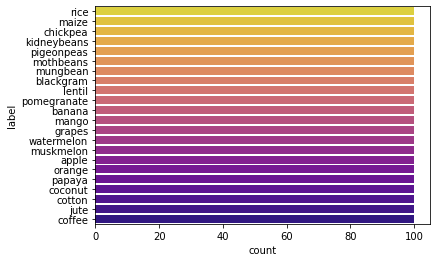

In [ ]:
sns.countplot(y='label',data=df, palette="plasma_r")

Checking Ph values if they fall between 6 to 7

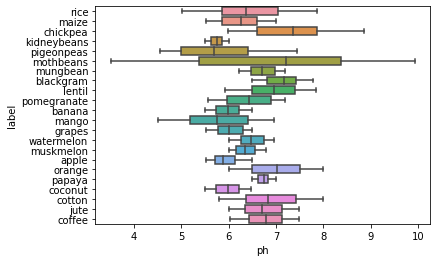

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

Preprocessing

In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

Checking relation between P and K

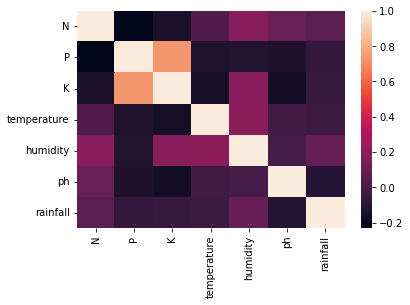

In [ ]:
sns.heatmap(X.corr())

SCALLING


MIN MAX

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

STANDARD SCALLER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = StandardScaler()
X_train_scaled_ST = scaler.fit_transform(X_train)

X_test_scaled_ST = scaler.transform(X_test)

KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

KNN WITH STANDARD SCALER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled_ST, y_train)
knn.score(X_test_scaled_ST, y_test)
classess = df["label"].unique()
print(classess)
newdata=knn.predict([[60,55,44,23.004459,82.320763,7.840207,	263.964248]])
print(classess[newdata]) 
# print(classification_report(y_test,predicted_values))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['jute']


DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train_scaled,y_train)

predicted_values = DecisionTree.predict(X_test_scaled)
# print(predicted_values)
classess = df["label"].unique()
print(classess)
newdata=DecisionTree.predict([[60,55,44,23.004459,82.320763,7.840207,	263.964248]])
print(classess[newdata]) 

print(newdata)
DecisionTree.score(X_test_scaled, y_test)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['rice']
[0]


0.9218181818181819

DECISION TREE WITH STANDARD SCALER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="gini",random_state=2)

DecisionTree.fit(X_train_scaled_ST,y_train)

predicted_values = DecisionTree.predict(X_test_scaled_ST)
DecisionTree.score(X_test_scaled_ST, y_test)

y_pred_test = DecisionTree.predict(X_test_scaled_ST)
print("Accuracy : ")
accuracy_score(y_test, y_pred_test)
print(classification_report(y_test,predicted_values))
# x = metrics.accuracy_score(y_test, predicted_values)

Accuracy : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       0.97      1.00      0.98        28
           3       1.00      0.91      0.95        23
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       0.93      0.96      0.95        27
           9       0.93      1.00      0.96        27
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        23
          13       1.00      0.97      0.98        29
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        33
          16       1.00      1.00      1.00        19
          17   

DECISION TREE WITH GINI INDEX

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2)

DecisionTree.fit(X_train_scaled_ST,y_train)

predicted_values = DecisionTree.predict(X_test_scaled_ST)
DecisionTree.score(X_test_scaled_ST, y_test)

y_pred_test = DecisionTree.predict(X_test_scaled_ST)
print("Accuracy : ")
classess = df["label"].unique()
print(classess)
newdata=DecisionTree.predict([[90,42,43,20.87,82.00,6.5,	202]])
print(classess[newdata]) 

accuracy_score(y_test, y_pred_test)
print(classification_report(y_test,predicted_values))
# x = metrics.accuracy_score(y_test, predicted_values)

Accuracy : 
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['rice']
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      1.00      1.00        24
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       0.96      0.93      0.94        27
           9       1.00      0.96      0.98        27
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00     

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), DecisionTree.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train_scaled, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


In [ ]:
from sklearn.metrics import accuracy_score
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = clf.predict(data)
classess = df["label"].unique()
print(classess)
newdata=clf.predict([[60,55,44,23.004459,82.320763,7.840207,	263.964248]])
print(classess[newdata]) 

# print(prediction)
print(classification_report(y_test,predicted_values))

# y_pred_test = clf.predict(X_test_scaled)
# accuracy_score(y_test, y_pred_test)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['rice']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.92      1.00      0.96        24
           2       0.65      1.00      0.79        28
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      0.95      0.98        21
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       1.00      0.26      0.41        27
           9       1.00      0.74      0.85        27
          10       0.92      1.00      0.96        23
          11       0.96      1.00      0.98        24
          12       1.00      0.96      0.98        23
      

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

SVM

In [ ]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled_ST, y_train)
classess = df["label"].unique()
print(classess)
newdata=svc_linear.predict([[60,55,44,23.004459,82.320763,7.840207,	263.964248]])
print(classess[newdata]) 

print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled_ST,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled_ST,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled_ST,y_test))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
['jute']
Linear Kernel Accuracy:  0.9854545454545455
Rbf Kernel Accuracy:  0.06363636363636363
Poly Kernel Accuracy:  0.4509090909090909


LOGISTIC REGRESSION

In [ ]:

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train_scaled_ST,y_train)

predicted_values = LogReg.predict(X_test_scaled_ST)
classess = df["label"].unique()
print(classess)
newdata=LogReg.predict([[60,55,44,23.004459,82.320763,7.840207,	263.964248]])
print("boom = :", classess[newdata]) 

x = metrics.accuracy_score(y_test, predicted_values)
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
boom = : ['jute']
Logistic Regression's Accuracy is:  0.9654545454545455
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       0.93      0.93      0.93        28
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        37
           8       0.89      0.89      0.89        27
           9       0.96      0.96      0.96        27
          10       0.92      0.96      0.94        23
          11       1.00      1.00      1.00       